In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings("ignore")

In [33]:
data = pd.read_excel("E://Flexible_proj_lab/broad_assets_weekly_rets.xlsx")
data

,Date,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
0,2000-07-31,0.015154,0.075677,-0.002266,0.000897,0.042162,0.004952,0.037313,0.002093,-0.002477,-0.008385,-0.031787
1,2000-08-07,0.067870,0.052623,0.015929,0.013358,0.036514,-0.023689,-0.019612,-0.011556,0.024090,-0.026565,0.034584
2,2000-08-14,0.015698,0.002262,0.015185,0.006338,0.017116,0.025353,0.029392,0.036872,0.008525,0.006253,0.048137
3,2000-08-21,0.009488,0.056625,-0.001838,-0.000252,0.006775,-0.026410,0.001619,-0.002437,0.007701,0.001821,0.038370
4,2000-08-28,0.018391,0.065276,0.001894,0.004126,0.037931,-0.035294,0.019534,-0.017000,0.001856,-0.009469,0.031318
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2024-08-12,0.060689,0.071826,-0.044042,-0.014738,0.020995,0.042517,0.043057,0.088217,0.009326,0.050343,0.058296
1254,2024-08-19,0.100581,0.134610,0.019896,-0.000441,0.103698,0.032142,0.093122,0.077077,-0.023833,0.023948,-0.037742
1255,2024-08-26,0.002016,-0.026628,0.002796,0.006442,0.045003,0.054048,0.029013,-0.017973,-0.019513,0.009670,0.033216
1256,2024-08-30,0.010834,0.005016,-0.030972,-0.009397,-0.000694,0.009146,0.012656,-0.005479,0.017512,-0.012593,-0.034825


In [34]:
classification_prediction = pd.read_excel("E://Flexible_proj_lab/broad_assets_predictions.xlsx")
classification_prediction

,Date,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
0,2004-10-11,1,1,1,1,1,1,1,1,1,1,1
1,2004-10-18,1,1,1,1,1,0,1,1,1,1,1
2,2004-10-25,0,0,1,1,0,1,1,0,1,0,1
3,2004-11-01,1,1,1,1,0,1,1,0,1,1,1
4,2004-11-08,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2024-08-05,1,1,1,1,1,1,1,1,1,1,1
1035,2024-08-12,1,1,1,1,1,1,1,1,1,1,1
1036,2024-08-19,1,1,1,1,1,1,1,1,1,1,1
1037,2024-08-26,1,1,1,1,1,1,1,1,1,1,1


In [35]:
data = data.iloc[218:, :]
data = data.reset_index(drop=True)
data

,Date,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
0,2004-10-11,-0.018712,-0.029864,0.008649,0.005917,-0.039239,-0.010879,0.011561,-0.013872,-0.021990,0.038305,0.114916
1,2004-10-18,-0.018733,0.026604,0.017140,0.012075,-0.019599,0.051072,-0.013756,-0.039410,-0.008803,-0.028019,-0.021278
2,2004-10-25,-0.034546,-0.034998,0.022613,0.012032,-0.002078,-0.032798,0.010980,-0.003362,-0.046698,0.058751,0.063884
3,2004-11-01,0.066461,0.078883,-0.020959,-0.013043,0.054009,0.067078,0.050041,0.054582,0.006502,-0.004775,-0.084004
4,2004-11-08,0.061602,0.051752,-0.020057,-0.014760,0.051650,-0.011763,0.059886,0.048522,-0.026944,0.019736,-0.013868
...,...,...,...,...,...,...,...,...,...,...,...,...
1035,2024-08-12,0.060689,0.071826,-0.044042,-0.014738,0.020995,0.042517,0.043057,0.088217,0.009326,0.050343,0.058296
1036,2024-08-19,0.100581,0.134610,0.019896,-0.000441,0.103698,0.032142,0.093122,0.077077,-0.023833,0.023948,-0.037742
1037,2024-08-26,0.002016,-0.026628,0.002796,0.006442,0.045003,0.054048,0.029013,-0.017973,-0.019513,0.009670,0.033216
1038,2024-08-30,0.010834,0.005016,-0.030972,-0.009397,-0.000694,0.009146,0.012656,-0.005479,0.017512,-0.012593,-0.034825


First I construct the equally weighted benchmark portfolio

In [36]:
def cal_cum_return(ret):
    res = []
    cum_sum = 1
    for i in range(len(ret)):
        cum_sum*=(1+ret[i])
        res.append(cum_sum)
    return res

In [37]:
def summary_statistics_annualized(returns, annual_factor=52):
    summary_statistics = pd.DataFrame(index=[0])
    summary_statistics['Mean'] = returns.mean()*annual_factor
    summary_statistics['Vol'] = returns.std()*np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = (returns.mean()/returns.std())*np.sqrt(annual_factor)
    summary_statistics['Min'] = returns.min()
    summary_statistics['Max'] = returns.max()
    summary_statistics['Skewness'] = skew(returns)
    summary_statistics['Excess Kurtosis'] = kurtosis(returns)
    summary_statistics['VaR (0.05)'] = np.quantile(returns, 0.05)
    summary_statistics['CVaR (0.05)'] = returns[returns<=np.quantile(returns, 0.05)].mean()
    cumulative_returns = np.cumprod(1+returns)
    rolling_max = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns-rolling_max)/rolling_max
    max_drawdown = drawdown.min()
    summary_statistics['Max Drawdown'] = max_drawdown
    return summary_statistics

In [38]:
ind_dict = {f'Asset {i}':i-1 for i in range(1, 12)}

In [39]:
equal_weight = data.iloc[:, 1:].values*(1/11)
portfolio_return = equal_weight.sum(axis=1)[1:]

In [40]:
data1 = data.set_index('Date')

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown
0,0.139875,0.24141,0.57941,-0.216743,0.215569,-0.124331,7.688133,-0.048421,-0.07812,-0.637523


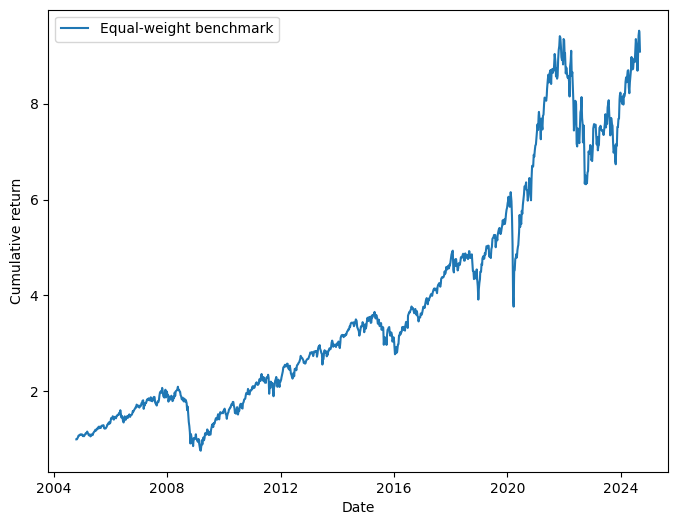

In [41]:
# plot the portfolio returns figure
x = np.array(data1.index)[1:]
y_benchmark = cal_cum_return(portfolio_return)
fig = plt.figure(figsize=(8,6))
plt.plot(x, y_benchmark, label='Equal-weight benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend()
# report the summary statistics
final_stats = summary_statistics_annualized(portfolio_return)
final_stats

In [42]:
class dynamic_ridge_optimizer:
    def __init__(self, data, cls_data, sigma, ridge_penalty, lookback_period, eval, start_date_lst=[], end_date_lst=[]):
        # eval is a parameter that user can choose from 'Sharpe' or 'Drawdown'
        # if 'Sharpe', means we want to max(Sharpe) to determine optimal lookback
        # if 'Drawdown', means we want to min(Drawdown) to determine optimal lookback
        self.data = data
        self.classification_data = cls_data
        self.sigma = sigma
        self.ridge_penalty = ridge_penalty
        self.lookback_period = lookback_period
        self.start_date_lst = start_date_lst
        self.end_date_lst = end_date_lst
        self.start_index = []
        self.end_index = []
        self.eval = eval
        self.weight_matrix = [[0 for _ in range(self.data.shape[1]-1)] for _ in range(self.data.shape[0])]
        self.optimal_lookback_lst = []

    def calculate_cum_return(self, ret):
        res = []
        cum_sum = 1
        for i in range(len(ret)):
            cum_sum*=(1+ret[i])
            res.append(cum_sum)
        return res
    
    def find_yearly_date(self):
        date_lst = self.data['Date']
        i = 0
        while (i<=self.data.shape[0]-2):
            self.start_date_lst.append(date_lst[i])
            self.start_index.append(i)
            j = i+1
            while (j<=self.data.shape[0]-1):
                if (date_lst[j]-date_lst[i]).days>=365:
                    self.end_date_lst.append(date_lst[j])
                    self.end_index.append(j)
                    break
                else:
                    j+=1
            i = j
        self.end_date_lst.append(date_lst[self.data.shape[0]-2])
        self.end_index.append(data.shape[0]-2)

    def single_dynamic_ridge_optimization(self, start_ind, look_back):
        # for the weeks before the look_back period, we just do equal weight for the assets
        backtest_weight_matrix = [[0 for _ in range(self.data.shape[1]-1)] for _ in range(start_ind+1)]
        for i in range(look_back-1):
            row = self.classification_data.iloc[i, 1:].values
            count = 0
            for j in range(self.classification_data.shape[1]-1):
                if (row[j]>0): # consider it
                    count+=1
                    backtest_weight_matrix[i][j] = 1
            for j in range(self.classification_data.shape[1]-1):
                if backtest_weight_matrix[i][j]==1:
                    backtest_weight_matrix[i][j] = 1/count

        for i in range(look_back-1, start_ind+1):
            row = self.classification_data.iloc[i, 1:]
            positive_returns = row[row>0]
            target_matrix = data.loc[i-look_back+1:i, positive_returns.index]
        
            covariance_matrix = target_matrix.cov().values
            mean_return = target_matrix.mean().values
            num_of_assets = len(mean_return)
            if (num_of_assets==0):
                continue
            # optimization
            def objective(weights):
                portfolio_return = np.dot(weights, mean_return)
                ridge_term = self.ridge_penalty*np.sum(weights**2)
                return -(portfolio_return-ridge_term)
            def variance_constraint(weights):
                portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
                return self.sigma-portfolio_variance
            constrains = [{'type':'eq', 'fun':lambda weights: np.sum(weights)-1}, 
                        {'type':'ineq', 'fun': variance_constraint}]
            bounds = tuple((0,1) for _ in range(num_of_assets))
            initial_weights = num_of_assets*[1/num_of_assets]

            result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constrains)
            optimal_weight = result.x if result.success else np.zeros(num_of_assets)
            
            for j in range(len(optimal_weight)):
                asset = positive_returns.index[j]
                ind = ind_dict[asset]
                backtest_weight_matrix[i][ind] = optimal_weight[j]

        weight_DataFrame = pd.DataFrame(backtest_weight_matrix, index=self.data['Date'][0:start_ind+1], columns=[f'Asset {i}' for i in range(1,12)])
        weight_DataFrame = weight_DataFrame.iloc[0:-1, :]
        weights = weight_DataFrame.values
        data1 = self.data.iloc[1:start_ind+1, :]
        data1 = data1.set_index('Date')
        week_returns = data1.values
        portfolio_returns = np.sum(weights*week_returns, axis=1)
        final_stats = summary_statistics_annualized(portfolio_returns)
        if (self.eval=='Sharpe'):
            return final_stats['Sharpe']
        else:
            return final_stats['Max Drawdown']

    def find_optimum_lookback(self, start_ind):
        if self.eval=='Sharpe': # choose Sharpe as the evaluation metric
            sharpe_lst = np.array([])
            for look_back in self.lookback_period:
                sharpe = self.single_dynamic_ridge_optimization(start_ind, look_back)
                sharpe_lst = np.append(sharpe_lst, sharpe)
            self.optimal_lookback_lst.append(self.lookback_period[np.argmax(sharpe_lst)])
            return self.lookback_period[np.argmax(sharpe_lst)] # the optimal lookback in the backtest
        else: # choose Drawdown as the evaluation metric
            drawdown_lst = np.array([])
            for look_back in self.lookback_period:
                drawdown = self.single_dynamic_ridge_optimization(start_ind, look_back)
                drawdown_lst = np.append(drawdown_lst, drawdown)
            self.optimal_lookback_lst.append(self.lookback_period[np.argmin(drawdown_lst)])
            return self.lookback_period[np.argmin(drawdown_lst)]

    def optimize_weight_in_next_year(self, start_ind, end_ind):
        optimal_lookback = self.find_optimum_lookback(start_ind)
        for i in range(start_ind, end_ind+1):
            row = self.classification_data.iloc[i, 1:]
            positive_returns = row[row>0]
            target_matrix = data.loc[i-optimal_lookback+1:i, positive_returns.index]
        
            covariance_matrix = target_matrix.cov().values
            mean_return = target_matrix.mean().values
            num_of_assets = len(mean_return)
            if (num_of_assets==0):
                continue
            # optimization
            def objective(weights):
                portfolio_return = np.dot(weights, mean_return)
                ridge_term = self.ridge_penalty*np.sum(weights**2)
                return -(portfolio_return-ridge_term)
            def variance_constraint(weights):
                portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
                return self.sigma-portfolio_variance
            constrains = [{'type':'eq', 'fun':lambda weights: np.sum(weights)-1}, 
                        {'type':'ineq', 'fun': variance_constraint}]
            bounds = tuple((0,1) for _ in range(num_of_assets))
            initial_weights = num_of_assets*[1/num_of_assets]

            result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constrains)
            optimal_weight = result.x if result.success else np.zeros(num_of_assets)

            for j in range(len(optimal_weight)):
                asset = positive_returns.index[j]
                ind = ind_dict[asset]
                self.weight_matrix[i][ind] = optimal_weight[j]

    def loop_to_update_optimized_weight(self):
        self.find_yearly_date()
        for i in range(1, len(self.start_index)):
            start_ind = self.start_index[i]
            end_ind = self.end_index[i]
            self.optimize_weight_in_next_year(start_ind, end_ind)

    def report_summary_statistics(self):
        self.loop_to_update_optimized_weight() # we get the optimized weight matrix
        weight_DataFrame = pd.DataFrame(self.weight_matrix, index=self.data['Date'], columns=[f'Asset {i}' for i in range(1, 12)])
        weight_DataFrame = weight_DataFrame.iloc[self.start_index[1]:-1, :] 
        # print(weight_DataFrame)
        weight_DataFrame.to_excel(f'E://Flexible_proj_lab/classification_{self.eval}_weight.xlsx')
        weights = weight_DataFrame.values
        data1 = self.data.iloc[self.start_index[1]+1:, :]
        data1 = data1.set_index('Date')
        week_returns = data1.values
        portfolio_returns = np.sum(weights*week_returns, axis=1)
        x = np.array(data1.index)
        y = self.calculate_cum_return(portfolio_returns)
        benchmark_portfolio = np.sum((1/11)*week_returns, axis=1)
        y1 = self.calculate_cum_return(benchmark_portfolio)
        fig = plt.figure(figsize=(8, 6))
        plt.plot(x, y, label='Ridge MVO')
        plt.plot(x, y1, label='benchmark')
        plt.xlabel('Date')
        plt.ylabel('Cumulative return')
        plt.legend()
        final_stats = summary_statistics_annualized(portfolio_returns)
        return final_stats
    
    def report_recent_performance(self): # focus on the performance and summary statistics from 2020-2024
        weight_DataFrame = pd.DataFrame(self.weight_matrix, index=self.data['Date'], columns=[f'Asset {i}' for i in range(1, 12)])
        weight_DataFrame = weight_DataFrame.iloc[self.start_index[-4]:-1, :]
        weights = weight_DataFrame.values
        data2 = self.data.iloc[self.start_index[-4]+1:, :]
        data2 = data2.set_index('Date')
        week_returns = data2.values
        portfolio_returns = np.sum(weights*week_returns, axis=1)
        x = np.array(data2.index)
        y = self.calculate_cum_return(portfolio_returns)
        fig = plt.figure(figsize=(8, 6))
        plt.plot(x, y, label='Recent Ridge MVO')
        plt.xlabel('Date')
        plt.ylabel('Cumulative return')
        plt.legend()
        final_stats = summary_statistics_annualized(portfolio_returns)
        return final_stats


In [43]:
lookback_periods = [4, 13, 26, 39, 52]

In [44]:
obj = dynamic_ridge_optimizer(data, classification_prediction, 0.02, 0.01, lookback_periods, eval='Sharpe')

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown
0,0.177321,0.313534,0.565557,-0.178631,0.236667,0.084107,3.628753,-0.06933,-0.102612,-0.481698


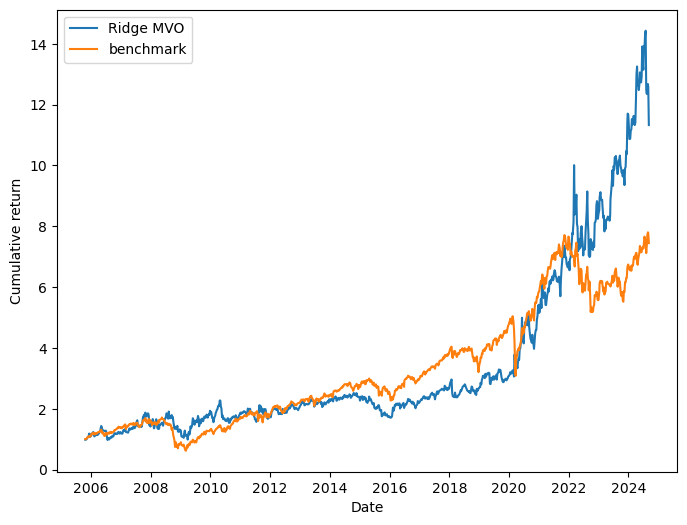

In [45]:
obj.report_summary_statistics()

In [46]:
obj_1 = dynamic_ridge_optimizer(data, classification_prediction, 0.02, 0.01, lookback_periods, eval='Drawdown')

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown
0,0.153448,0.279296,0.549411,-0.16888,0.189546,-0.354373,2.349924,-0.059362,-0.094403,-0.521339


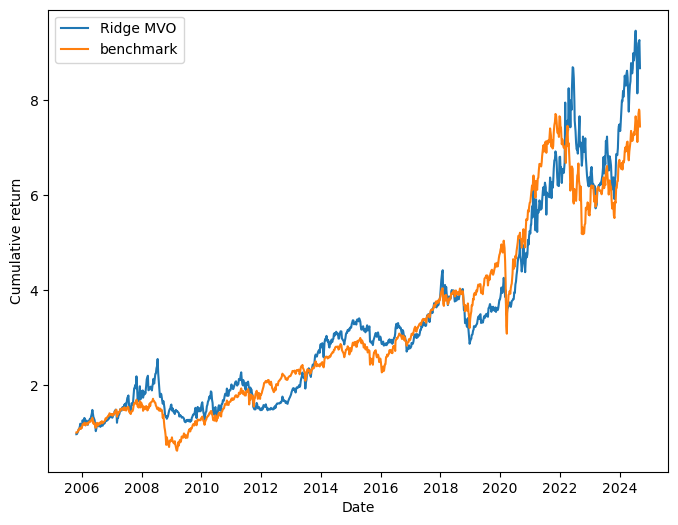

In [47]:
obj_1.report_summary_statistics()